# Lab 1 MSDS 7331 Section 404

## Johnson Ekedum, Ekaterina Pirogova, Victor Yim

### 9/17/2017


### Business Understanding

Diabetes is a disease in which the body�s ability to produce or respond to the hormone insulin is impaired.  This causes the elevation of glucose level in the blood and urine.  Complication from diabetes can lead to further cardiovascular disease, nerve damage, kidney failure, eye damage and many others.   Researchers and doctors have been working on prevention and care for decades.  This project is an attempt to leverage the data collected from 1999 to 2008 on over one hundred thousand patient from clinical care at 130 hospitals.  50 features were collected on the patients and the hospital outcome. We hope to find features which are correlated with higher chance of readmittance and we hope that medical personal can affect on those features to lower readmittance rate wthin 30 days into the hospitals.


### Data Understanding

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

For this analysis, we leveraged a dataset from UCI Machine Learning Repository.  https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008
The dataset contains over 100,000 records of patients' visit to over 130 hospitals.  There are 50 variables in the datasets.  Reference table below is the summary description of the variables obtained from BioMed Research International Journal publication.  https://www.hindawi.com/journals/bmri/2014/781670/

Data Description:                                                                                                                                  

**Feature name**|**Type**|**Description and values**
:-----:|:-----:|:-----:
Encounter ID|Numeric|Unique identifier of an encounter
Patient number|Numeric|Unique identifier of a patient
Race|Nominal|Values: Caucasian / Asian / African American / Hispanic / and other
Gender|Nominal|Values: male / female / and unknown/invalid
Age|Nominal|Grouped in 10-year intervals: 0 - 10)  10 - 20) / � / 90 - 100)
Weight|Numeric|Weight in pounds.
Admission type|Nominal|Integer identifier corresponding to 9 distinct values. For example emergency / urgent / elective / newborn / and not available
Discharge disposition|Nominal|Integer identifier corresponding to 29 distinct values. For example discharged to home / expired / and not available
Admission source|Nominal|Integer identifier corresponding to 21 distinct values. For example physician referral / emergency room / and transfer from a hospital
Time in hospital|Numeric|Integer number of days between admission and discharge
Payer code|Nominal|Integer identifier corresponding to 23 distinct values. For example Blue Cross/Blue Shield / Medicare / and self-pay
Medical specialty|Nominal|Integer identifier of a specialty of the admitting physician / corresponding to 84 distinct values / for example / cardiology / internal medicine / family/general practice / and surgeon
Number of lab procedures|Numeric|Number of lab tests performed during the encounter
Number of procedures|Numeric|Number of procedures (other than lab tests) performed during the encounter
Number of medications|Numeric|Number of distinct generic names administered during the encounter
Number of outpatient visits|Numeric|Number of outpatient visits of the patient in the year preceding the encounter
Number of emergency visits|Numeric|Number of emergency visits of the patient in the year preceding the encounter
Number of inpatient visits|Numeric|Number of inpatient visits of the patient in the year preceding the encounter
Diagnosis 1|Nominal|The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
Diagnosis 2|Nominal|Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
Diagnosis 3|Nominal|Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
Number of diagnoses|Numeric|Number of diagnoses entered to the system
Glucose serum test result|Nominal|Indicates the range of the result or if the test was not taken. Values: �>200 /� �>300 /� �normal /� and �none� if not measured
A1c test result|Nominal|Indicates the range of the result or if the test was not taken. Values: �>8� if the result was greater than 8% / �>7� if the result was greater than 7% but less than 8% / �normal� if the result was less than 7% / and �none� if not measured.
Change of medications|Nominal|Indicates if there was a change in diabetic medications (either dosage or generic name). Values: �change� and �no change�
Diabetes medications|Nominal|Indicates if there was any diabetic medication prescribed. Values: �yes� and �no�
24 features for medications|Nominal|For the generic names: metformin / repaglinide / nateglinide / chlorpropamide / glimepiride / acetohexamide / glipizide / glyburide / tolbutamide / pioglitazone / rosiglitazone / acarbose / miglitol / troglitazone / tolazamide / examide / sitagliptin / insulin / glyburide-metformin / glipizide-metformin / glimepiride-pioglitazone / metformin-rosiglitazone / and metformin-pioglitazone / the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: �up� if the dosage was increased during the encounter / �down� if the dosage was decreased / �steady� if the dosage did not change / and �no� if the drug was not prescribed
Readmitted|Nominal|Days to inpatient readmission. Values: �30� if the patient was readmitted in more than 30 days / and �No� for no record of readmission.


Our team performed further validation to ensure descriptions match to the dataset.  A few variances were detected and adjustment was made.  


====================================================================================================================



In [1]:
# import data and all referenced libraries and set graph and chart style for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import warnings
import seaborn as sns
import matplotlib as mpl
import pylab
from sklearn.decomposition import PCA
from sklearn import datasets as ds

%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "palettes")))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

diab = pd.read_csv('D:\Documents\Study\SMU\Term3\DataMining\Project\Data\diabetic_data.csv')

# Replace missing values to NaN
diab = diab.replace(to_replace='?',value=np.nan)

We first reviewed each of the variables visually to gain high-level understanding of the data as well as doing out preliminary inspection on data quality.

In [2]:
diab.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#describe object variables
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
diab.describe(include=["O"])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


Now, we'll have a look at the numeric variables. We have only one continuous variable - weight, all other variables are categorical and represent counts or id.

In [4]:
#describe numeric variables
diab.describe(include=[np.number])

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.


##### Missing values

The dataset contains 101,766 records.  Missing values vary greatly among variables. 

**Variable**|**Missing Values**|**% of Missing Values**
-----|-----|-----
race|2273|2.23%
gender (unknown)|3|0.003%
weight|98567|96.85%
payer\_code|40256|39.56%
medical\_specialty|49949|49.08%
diag\_2|358|0.35%
diag\_3|1423|1.40%

Only 7 variables above contain missing values.  All the other variables have complete records.  In regards to gender, while they are not labeled as a missing value, the "unknown/Invalid" population nonetheless provide challenges to the analysis.  Therefore, we treated the 3 records as missing values and used most_frequent levels to replace these values.  

We decided to use sci-kit learn imputer function using most_frequenty strategy to impute these missing variables.

In [5]:
diab["race"] = pd.Categorical(diab.race)
diab["code_race"] = diab.race.cat.codes
diab.ix[diab['code_race']== -1, ["code_race"]]=np.nan

from sklearn.preprocessing import Imputer
import numpy as np
imp=Imputer(missing_values="NaN", strategy="most_frequent")
imp.fit(diab[["code_race"]])
diab["code_race"]=imp.transform(diab[["code_race"]]).ravel()
###Imputation gave 2: therefore, we'll replace with caucasians
diab.ix[diab['race'].isnull(),["race"]]="Caucasian"

For the gender variable, we took the same approach.  As a result, we updated the unknown values to Females.

In [38]:
diab['gender'] = diab['gender'].replace(to_replace='Unknown/Invalid', value='Female')

For diag_2 (secondary diagnosis) and diag_3 (additional secondary diagnosis), it is highly possible for a patient to have only diag_1 (primary diagnosis).  Therefore, any missing values can be treated as "not applicable".  However, there are 79 records with diag_3 but without diag_2.  Upon further analysis, we decided to treat those 79 diag_3 records as a missed label from diag_2.

Due to a high number of missing values in payer_code and medical_speciality and because we believe they are not useful for readmittance prediction, we decided to drop these variables from our model.

In [7]:
diab.drop(["payer_code"],axis=1, inplace = True)
diab.drop(["medical_specialty"],axis=1, inplace = True)

Weight variable contains more than 96% of missing values. However, we decided to keep it to create a new variable - weight_status which will show if the measurement of weight was taken or not. We believe that this new variable could be useful in readmittance prediction.

In [8]:
#weigth is coded as meausrement taken or not
pd.options.mode.chained_assignment = None #supress warnings
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"

Our target is to know if the person was readmitted into the hospital within 30 days. For this reason, we'll create a new variable, where all people wich were readmitted into the hospital after 30 days past will be considered as not readmitted.

In [9]:
#make readmittance a dichotomous variable. If the person was readmitted after 30 days, consider not readmitted
pd.options.mode.chained_assignment = None #supress warnings
diab['readmitted'][diab['readmitted']==">30"]="NO"
#then make readmittance binary variable
diab['readmitted_Group']=np.nan
diab['readmitted_Group'][diab['readmitted']=="NO"]  = 0
diab['readmitted_Group'][diab['readmitted']=="<30"] = 1
diab["readmitted_Group"]=diab["readmitted_Group"].astype('int64')

##### Duplicate Data

Since each of the records within this dataset is intended to identify each visit, there are no duplicate records in this dataset.  However, if a patient has multiple visits it would have separate records denote each visit.  Upon further evaluation, there are 16,773 patients with multiple visits.  

**Number of visits**|**Count of Patients**
:-----:|:-----:
40|1
28|1
23|3
22|2
21|1
20|6
19|3
18|6
17|3
16|4
15|9
14|5
13|14
12|19
11|20
10|42
9|70
8|111
7|207
6|346
5|717
4|1421
3|3328
2|10434


##### Outliers
While a majority of variables have no missing value, the distribution of many variables is sparse.  For example, number_outpatient, number_emergency, and number_inpatient all have greater than 90% of values as 0.  
Variable number_diagnoses distribution drops off at 9 with only 114 records with value > = 10.  Further evaluation maybe needs to confirm data accuracy.

====================================================================================================================

There are also 2 categorical variables with only 1 level which provide no analytic value.  Both variables were dropped from the dataset.

In [10]:
#examide and citoglipton medications nobody used. Can drop variables
diab.drop(["examide"],axis=1, inplace = True)
diab.drop(["citoglipton"],axis=1, inplace = True)


#### Are there other features that could be added to the data or created from existing features? Which ones? 

After exploring the 50 variables, we decided it would be nice to have an information if the person was admitted for the first time with certain diagnosis. Because if the person was admitted for the first time with a certain diagnosis it can be indicated if the person is going to be readmitted into the hospital soon. For example, when the person was admitted to the hospital newly diagnosed with diabetes is very unlikely that this person would be readmitted soon because this person will learn how to manage the condition. 

Also, from existing ones we created two variables - weight_status, which shows if the measurement of weight was taken and diab_medications_count which shows the number of medications patient takes for diabetes management.


In [11]:
#lets create variable with number of diabetis management medications per record
diab['metformin-rosiglitazoneBinary']=1
diab['metformin-rosiglitazoneBinary'][diab["metformin-rosiglitazone"]=="No"]=0
diab['metformin-pioglitazoneBinary']=1
diab['metformin-pioglitazoneBinary'][diab["metformin-pioglitazone"]=="No"]=0
diab['glimepiride-pioglitazoneBinary']=1
diab['glimepiride-pioglitazoneBinary'][diab["glimepiride-pioglitazone"]=="No"]=0
diab['glipizide-metforminBinary']=1
diab['glipizide-metforminBinary'][diab["glipizide-metformin"]=="No"]=0
diab['glyburide-metforminBinary']=1
diab['glyburide-metforminBinary'][diab["glyburide-metformin"]=="No"]=0
diab['insulinBinary']=1
diab['insulinBinary'][diab["insulin"]=="No"]=0
diab['tolazamideBinary']=1
diab['tolazamideBinary'][diab["tolazamide"]=="No"]=0
diab['troglitazoneBinary']=1
diab['troglitazoneBinary'][diab["troglitazone"]=="No"]=0
diab['miglitolBinary']=1
diab['miglitolBinary'][diab["miglitol"]=="No"]=0
diab['acarboseBinary']=1
diab['acarboseBinary'][diab["acarbose"]=="No"]=0
diab['rosiglitazoneBinary']=1
diab['rosiglitazoneBinary'][diab["rosiglitazone"]=="No"]=0
diab['pioglitazoneBinary']=1
diab['pioglitazoneBinary'][diab["pioglitazone"]=="No"]=0
diab['metforminBinary']=1
diab['metforminBinary'][diab["metformin"]=="No"]=0
diab['repaglinideBinary']=1
diab['repaglinideBinary'][diab["repaglinide"]=="No"]=0
diab['nateglinideBinary']=1
diab['nateglinideBinary'][diab["nateglinide"]=="No"]=0
diab['chlorpropamideBinary']=1
diab['chlorpropamideBinary'][diab["chlorpropamide"]=="No"]=0
diab['glimepirideBinary']=1
diab['glimepirideBinary'][diab["glimepiride"]=="No"]=0
diab['acetohexamideBinary']=1
diab['acetohexamideBinary'][diab["acetohexamide"]=="No"]=0
diab['glipizideBinary']=1
diab['glipizideBinary'][diab["glipizide"]=="No"]=0
diab['glyburideBinary']=1
diab['glyburideBinary'][diab["glyburide"]=="No"]=0
diab['tolbutamideBinary']=1
diab['tolbutamideBinary'][diab["tolbutamide"]=="No"]=0
#let's check if some person takes multiple diabeties managment medications
medication_col=['metforminBinary','repaglinideBinary','nateglinideBinary','chlorpropamideBinary'
                  ,'glimepirideBinary','acetohexamideBinary','glipizideBinary','glyburideBinary','tolbutamideBinary',
                'pioglitazoneBinary','rosiglitazoneBinary','acarboseBinary','miglitolBinary','troglitazoneBinary',
                'tolazamideBinary','insulinBinary','glyburide-metforminBinary','glipizide-metforminBinary',
                'glimepiride-pioglitazone','metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary',
               "glimepiride-pioglitazoneBinary",'metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary']
summa=diab[medication_col].sum(axis=1)
print((diab[medication_col].sum(axis=1)>1).any())
#turns out some person (or maybe several) takes 6 medications for diabeties managment

True


In [12]:
medication_col=['metforminBinary','repaglinideBinary','nateglinideBinary','chlorpropamideBinary'
                  ,'glimepirideBinary','acetohexamideBinary','glipizideBinary','glyburideBinary','tolbutamideBinary',
                'pioglitazoneBinary','rosiglitazoneBinary','acarboseBinary','miglitolBinary','troglitazoneBinary',
                'tolazamideBinary','insulinBinary','glyburide-metforminBinary','glipizide-metforminBinary',
                'glimepiride-pioglitazone','metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary',
               "glimepiride-pioglitazoneBinary",'metformin-rosiglitazoneBinary','metformin-pioglitazoneBinary']
#creating new column with number of diabetic medication per hospital admittance
diab["diab_medications_count"]=np.nan
diab["diab_medications_count"]=diab[medication_col].sum(axis=1)
diab.drop(medication_col,axis=1, inplace = True)

#### Data quality
We detected a few data discrepancy in our data exploration phase.  

1)	Number of medications - while the data description explains there should be 24 medications, only 23 medications were contained in the dataset.

2)	Secondary diagnosis diag_2 and additional secondary diagnosis - diag_3 � there are patients with diag_3 values without diag_2.
 


### Data Preparation


The dataset mainly contains categorial data and many with high numbers of levels. In the case of diag_1, diag_2, and diag_3, we were able to use the coding description to combine them into 10 groups of diagnoses which each code represents. After that, we dropped original variables.

In [13]:
diab['encounter_id'] = diab['encounter_id'].astype(object)
diab['patient_nbr'] = diab['patient_nbr'].astype(object)
diab['admission_type_id'] = diab['admission_type_id'].astype(object)
diab['discharge_disposition_id'] = diab['discharge_disposition_id'].astype(object)
diab['admission_source_id'] = diab['admission_source_id'].astype(object)
diab['race'] = diab['race'].astype(object)
diab["A1Cresult"] = diab["A1Cresult"].astype(object)
diab["age"] = diab["age"].astype(object)
diab['max_glu_serum'] = diab['max_glu_serum'].astype(object)
diab['gender'] = diab['gender'].astype(object)
diab['diabetesMed'] = diab['diabetesMed'].astype(object)
diab['change'] = diab['change'].astype(object)


In [14]:
diag_num=["diag_1","diag_2","diag_3"]
#replace diagnosis containing E and V as -1 and -2
diab[diag_num] = diab[diag_num].replace({'E':'-1'}, regex=True)
diab[diag_num] = diab[diag_num].replace({'V':'-2'}, regex=True)

diab[diag_num] = diab[diag_num].astype(np.float)
#bin by diagnosis type
pd.options.mode.chained_assignment = None #supress warnings
#diagnosis 1
diab['diag_1_cat']=np.nan #empty column
diab['diag_1_cat'][(diab['diag_1']>=-2000)&(diab['diag_1']<1)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=280)&(diab['diag_1']<=389)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=630)&(diab['diag_1']<=679)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=740)&(diab['diag_1']<=759)] ="Other"
diab['diag_1_cat'][(diab['diag_1']>=1)&(diab['diag_1']<250)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=251)&(diab['diag_1']<280)] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=790)&(diab['diag_1']<=799)|((diab['diag_1']==780))|((diab['diag_1']==781))
                  |((diab['diag_1']==784))] ="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=680)&(diab['diag_1']<=709)|((diab['diag_1']==782))]="Neoplasms"
diab['diag_1_cat'][(diab['diag_1']>=250)&(diab['diag_1']<251)] ="Diabeties"
diab['diag_1_cat'][(diab['diag_1']>=390)&(diab['diag_1']<=459)|((diab['diag_1']==785))] ="Circulatory"
diab['diag_1_cat'][(diab['diag_1']>=460)&(diab['diag_1']<=519)|((diab['diag_1']==786))] ="Respiratory"
diab['diag_1_cat'][(diab['diag_1']>=520)&(diab['diag_1']<=579)|((diab['diag_1']==787))] ="Digestive"
diab['diag_1_cat'][(diab['diag_1']>=800)&(diab['diag_1']<=999)] ="Injury"
diab['diag_1_cat'][(diab['diag_1']>=710)&(diab['diag_1']<=739)] ="Musculoskeletal"
diab['diag_1_cat'][(diab['diag_1']>=580)&(diab['diag_1']<=629)|((diab['diag_1']==788))] ="Genitourinary"
diab['diag_1_cat'][diab['diag_1'].isnull()] ="No diagnosis"
#diagnosis 2
diab['diag_2_cat']=np.nan #empty column
diab['diag_2_cat'][(diab['diag_2']>=-2000)&(diab['diag_2']<1)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=280)&(diab['diag_2']<=389)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=630)&(diab['diag_2']<=679)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=740)&(diab['diag_2']<=759)] ="Other"
diab['diag_2_cat'][(diab['diag_2']>=1)&(diab['diag_2']<250)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=251)&(diab['diag_2']<280)] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=790)&(diab['diag_2']<=799)|((diab['diag_2']==780))|((diab['diag_2']==781))
                  |((diab['diag_2']==784))] ="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=680)&(diab['diag_2']<=709)|((diab['diag_2']==782))]="Neoplasms"
diab['diag_2_cat'][(diab['diag_2']>=250)&(diab['diag_2']<251)] ="Diabeties"
diab['diag_2_cat'][(diab['diag_2']>=390)&(diab['diag_2']<=459)|((diab['diag_2']==785))] ="Circulatory"
diab['diag_2_cat'][(diab['diag_2']>=460)&(diab['diag_2']<=519)|((diab['diag_2']==786))] ="Respiratory"
diab['diag_2_cat'][(diab['diag_2']>=520)&(diab['diag_2']<=579)|((diab['diag_2']==787))] ="Digestive"
diab['diag_2_cat'][(diab['diag_2']>=800)&(diab['diag_2']<=999)] ="Injury"
diab['diag_2_cat'][(diab['diag_2']>=710)&(diab['diag_2']<=739)] ="Musculoskeletal"
diab['diag_2_cat'][(diab['diag_2']>=580)&(diab['diag_2']<=629)|((diab['diag_2']==788))] ="Genitourinary"
diab['diag_2_cat'][diab['diag_2'].isnull()] ="No diagnosis"
#diagnosis 3
diab['diag_3_cat']=np.nan #empty column
diab['diag_3_cat'][(diab['diag_3']>=-2000)&(diab['diag_3']<1)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=280)&(diab['diag_3']<=389)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=630)&(diab['diag_3']<=679)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=740)&(diab['diag_3']<=759)] ="Other"
diab['diag_3_cat'][(diab['diag_3']>=1)&(diab['diag_3']<250)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=251)&(diab['diag_3']<280)] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=790)&(diab['diag_3']<=799)|((diab['diag_3']==780))|((diab['diag_3']==781))
                  |((diab['diag_3']==784))] ="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=680)&(diab['diag_3']<=709)|((diab['diag_3']==782))]="Neoplasms"
diab['diag_3_cat'][(diab['diag_3']>=250)&(diab['diag_3']<251)] ="Diabeties"
diab['diag_3_cat'][(diab['diag_3']>=390)&(diab['diag_3']<=459)|((diab['diag_3']==785))] ="Circulatory"
diab['diag_3_cat'][(diab['diag_3']>=460)&(diab['diag_3']<=519)|((diab['diag_3']==786))] ="Respiratory"
diab['diag_3_cat'][(diab['diag_3']>=520)&(diab['diag_3']<=579)|((diab['diag_3']==787))] ="Digestive"
diab['diag_3_cat'][(diab['diag_3']>=800)&(diab['diag_3']<=999)] ="Injury"
diab['diag_3_cat'][(diab['diag_3']>=710)&(diab['diag_3']<=739)] ="Musculoskeletal"
diab['diag_3_cat'][(diab['diag_3']>=580)&(diab['diag_3']<=629)|((diab['diag_3']==788))] ="Genitourinary"
diab['diag_3_cat'][diab['diag_3'].isnull()] ="No diagnosis"


#droping original variables
to_drop=['diag_1','diag_2','diag_3']
diab.drop(to_drop,axis=1, inplace = True)



# insert dictionary
admission_type_id_dict = {"1" : "Emergency",
"2" : "Urgent",
"3" : "Elective",
"4" : "Newborn",
"5" : "Not Available",
"6" : "NULL",
"7" : "Trauma Center",
"8" : "Not Mapped"}


discharge_disposition_id_dict= {"1" : "Discharged to home",
"2" : "Discharged/transferred to another short term hospital",
"3" : "Discharged/transferred to SNF",
"4" : "Discharged/transferred to ICF",
"5" : "Discharged/transferred to another type of inpatient care institution",
"6" : "Discharged/transferred to home with home health service",
"7" : "Left AMA",
"8" : "Discharged/transferred to home under care of Home IV provider",
"9" : "Admitted as an inpatient to this hospital",
"10" : "Neonate discharged to another hospital for neonatal aftercare",
"11" : "Expired",
"12" : "Still patient or expected to return for outpatient services",
"13" : "Hospice / home",
"14" : "Hospice / medical facility",
"15" : "Discharged/transferred within this institution to Medicare approved swing bed",
"16" : "Discharged/transferred/referred another institution for outpatient services",
"17" : "Discharged/transferred/referred to this institution for outpatient services",
"18" : "NULL",
"19" : "Expired at home. Medicaid only, hospice.",
"20" : "Expired in a medical facility. Medicaid only, hospice.",
"21" : "Expired, place unknown. Medicaid only, hospice.",
"22" : "Discharged/transferred to another rehab fac including rehab units of a hospital .",
"23" : "Discharged/transferred to a long term care hospital.",
"24" : "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
"25" : "Not Mapped",
"26" : "Unknown/Invalid",
"30" : "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
"27" : "Discharged/transferred to a federal health care facility.",
"28" : "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
"29" : "Discharged/transferred to a Critical Access Hospital (CAH)."}


discharge_disposition_id_dict= {"1" : " Physician Referral",
"2" : "Clinic Referral",
"3" : "HMO Referral",
"4" : "Transfer from a hospital",
"5" : " Transfer from a Skilled Nursing Facility (SNF)",
"6" : " Transfer from another health care facility",
"7" : " Emergency Room",
"8" : " Court/Law Enforcement",
"9" : " Not Available",
"10" : " Transfer from critial access hospital",
"11" : "Normal Delivery",
"12" : " Premature Delivery",
"13" : " Sick Baby",
"14" : " Extramural Birth",
"15" : "Not Available",
"17" : "NULL",
"18" : " Transfer From Another Home Health Agency",
"19" : "Readmission to Same Home Health Agency",
"20" : " Not Mapped",
"21" : "Unknown/Invalid",
"22" : " Transfer from hospital inpt/same fac reslt in a sep claim",
"23" : " Born inside this hospital",
"24" : " Born outside this hospital",
"25" : " Transfer from Ambulatory Surgery Center",
"26" : "Transfer from Hospice"}

### Visualize appropriate statistics

Using various plotting techniques, we attempt to understand the distribution of the different variables.
First, we tried to combine the race and gender variable and reviewed the result in a chart.

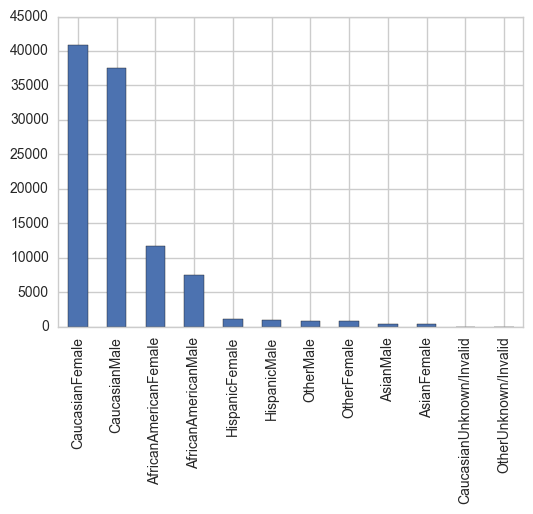

In [15]:
diab['race_gender'] = diab['race']+diab['gender']
pd.crosstab(diab.race_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['race_gender'].value_counts().plot(kind='bar')


We attempted the same methodology with age and gender variables

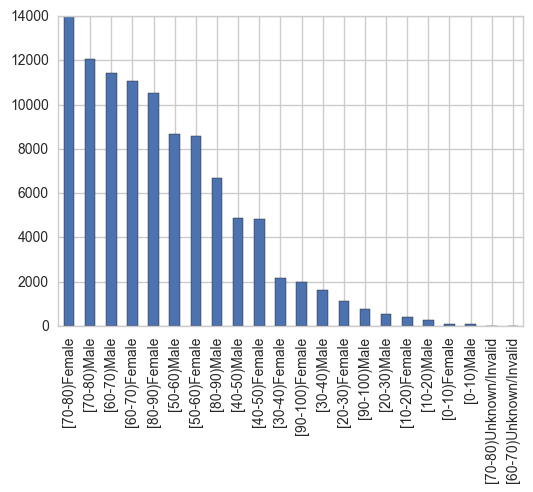

In [16]:
diab['age_gender'] = diab['age']+diab['gender']
pd.crosstab(diab.age_gender, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
diab['age_gender'].value_counts().plot(kind='bar')

We did not detect an anomaly in the distribution from the above.  We did, however, understand the age play significant factor in the hospital visits.

We then leverage boxplot to review the distribution among some of the numeric variables

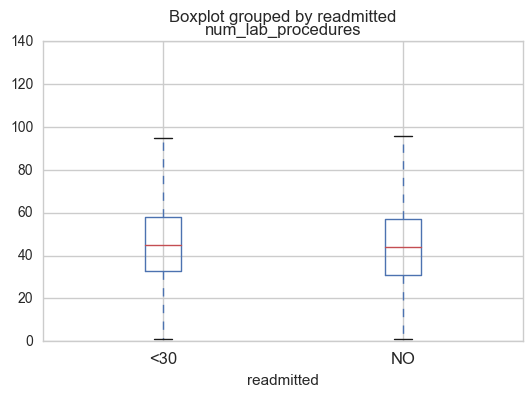

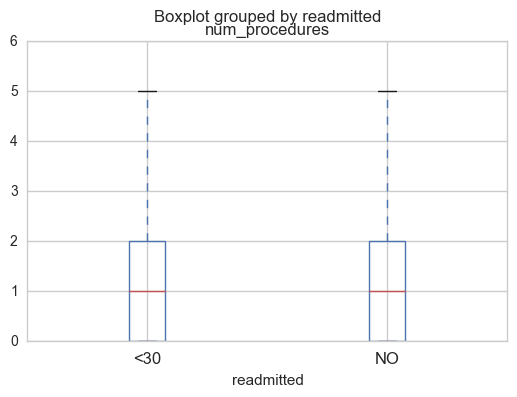

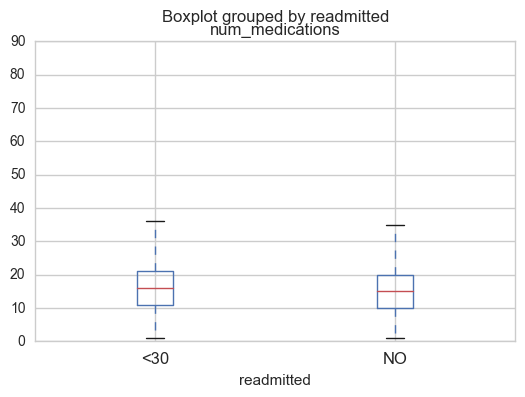

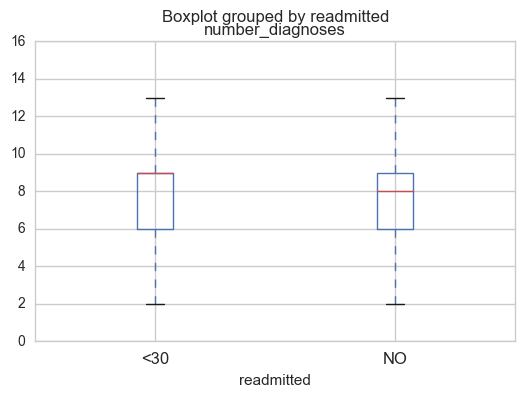

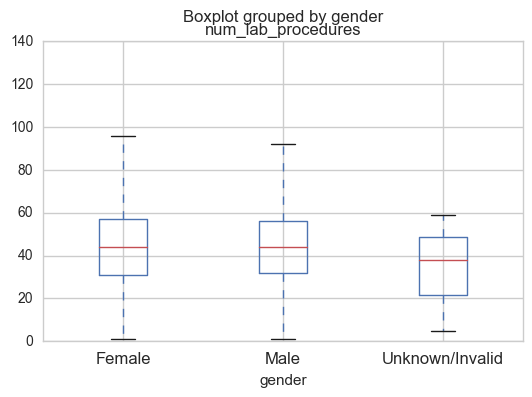

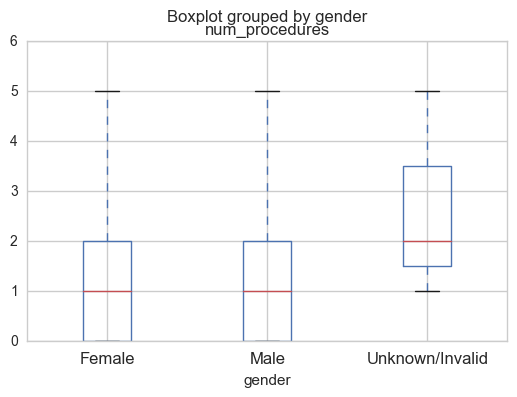

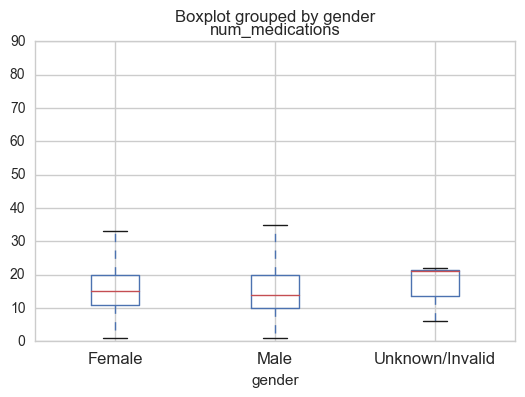

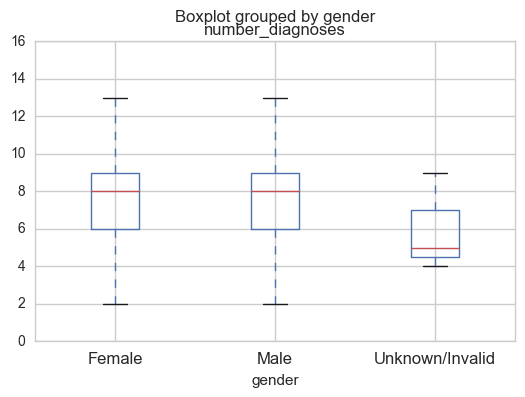

In [17]:
pd.crosstab(diab.readmitted, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.diabetesMed, diab.change).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.admission_source_id, diab.readmitted).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.num_lab_procedures).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(diab.readmitted, diab.A1Cresult).apply(lambda r: r/r.sum(), axis=1)


ax = diab.boxplot(column='num_lab_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_procedures', by = 'readmitted')
ax = diab.boxplot(column='num_medications', by = 'readmitted')
ax = diab.boxplot(column='number_diagnoses', by = 'readmitted')

ax = diab.boxplot(column='num_lab_procedures', by = 'gender')
ax = diab.boxplot(column='num_procedures', by = 'gender')
ax = diab.boxplot(column='num_medications', by = 'gender')
ax = diab.boxplot(column='number_diagnoses', by = 'gender')
# ax.set_yscale('log')

We found that gender by lab procedures have much different range even the mean are close.  This will be taken into consideration for the next level of analysis. 


Histograms were used to review the individual medication. We can see that most variables are right skewed with exception of variable number diagnoses.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013B11470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000118CDA90>]], dtype=object)

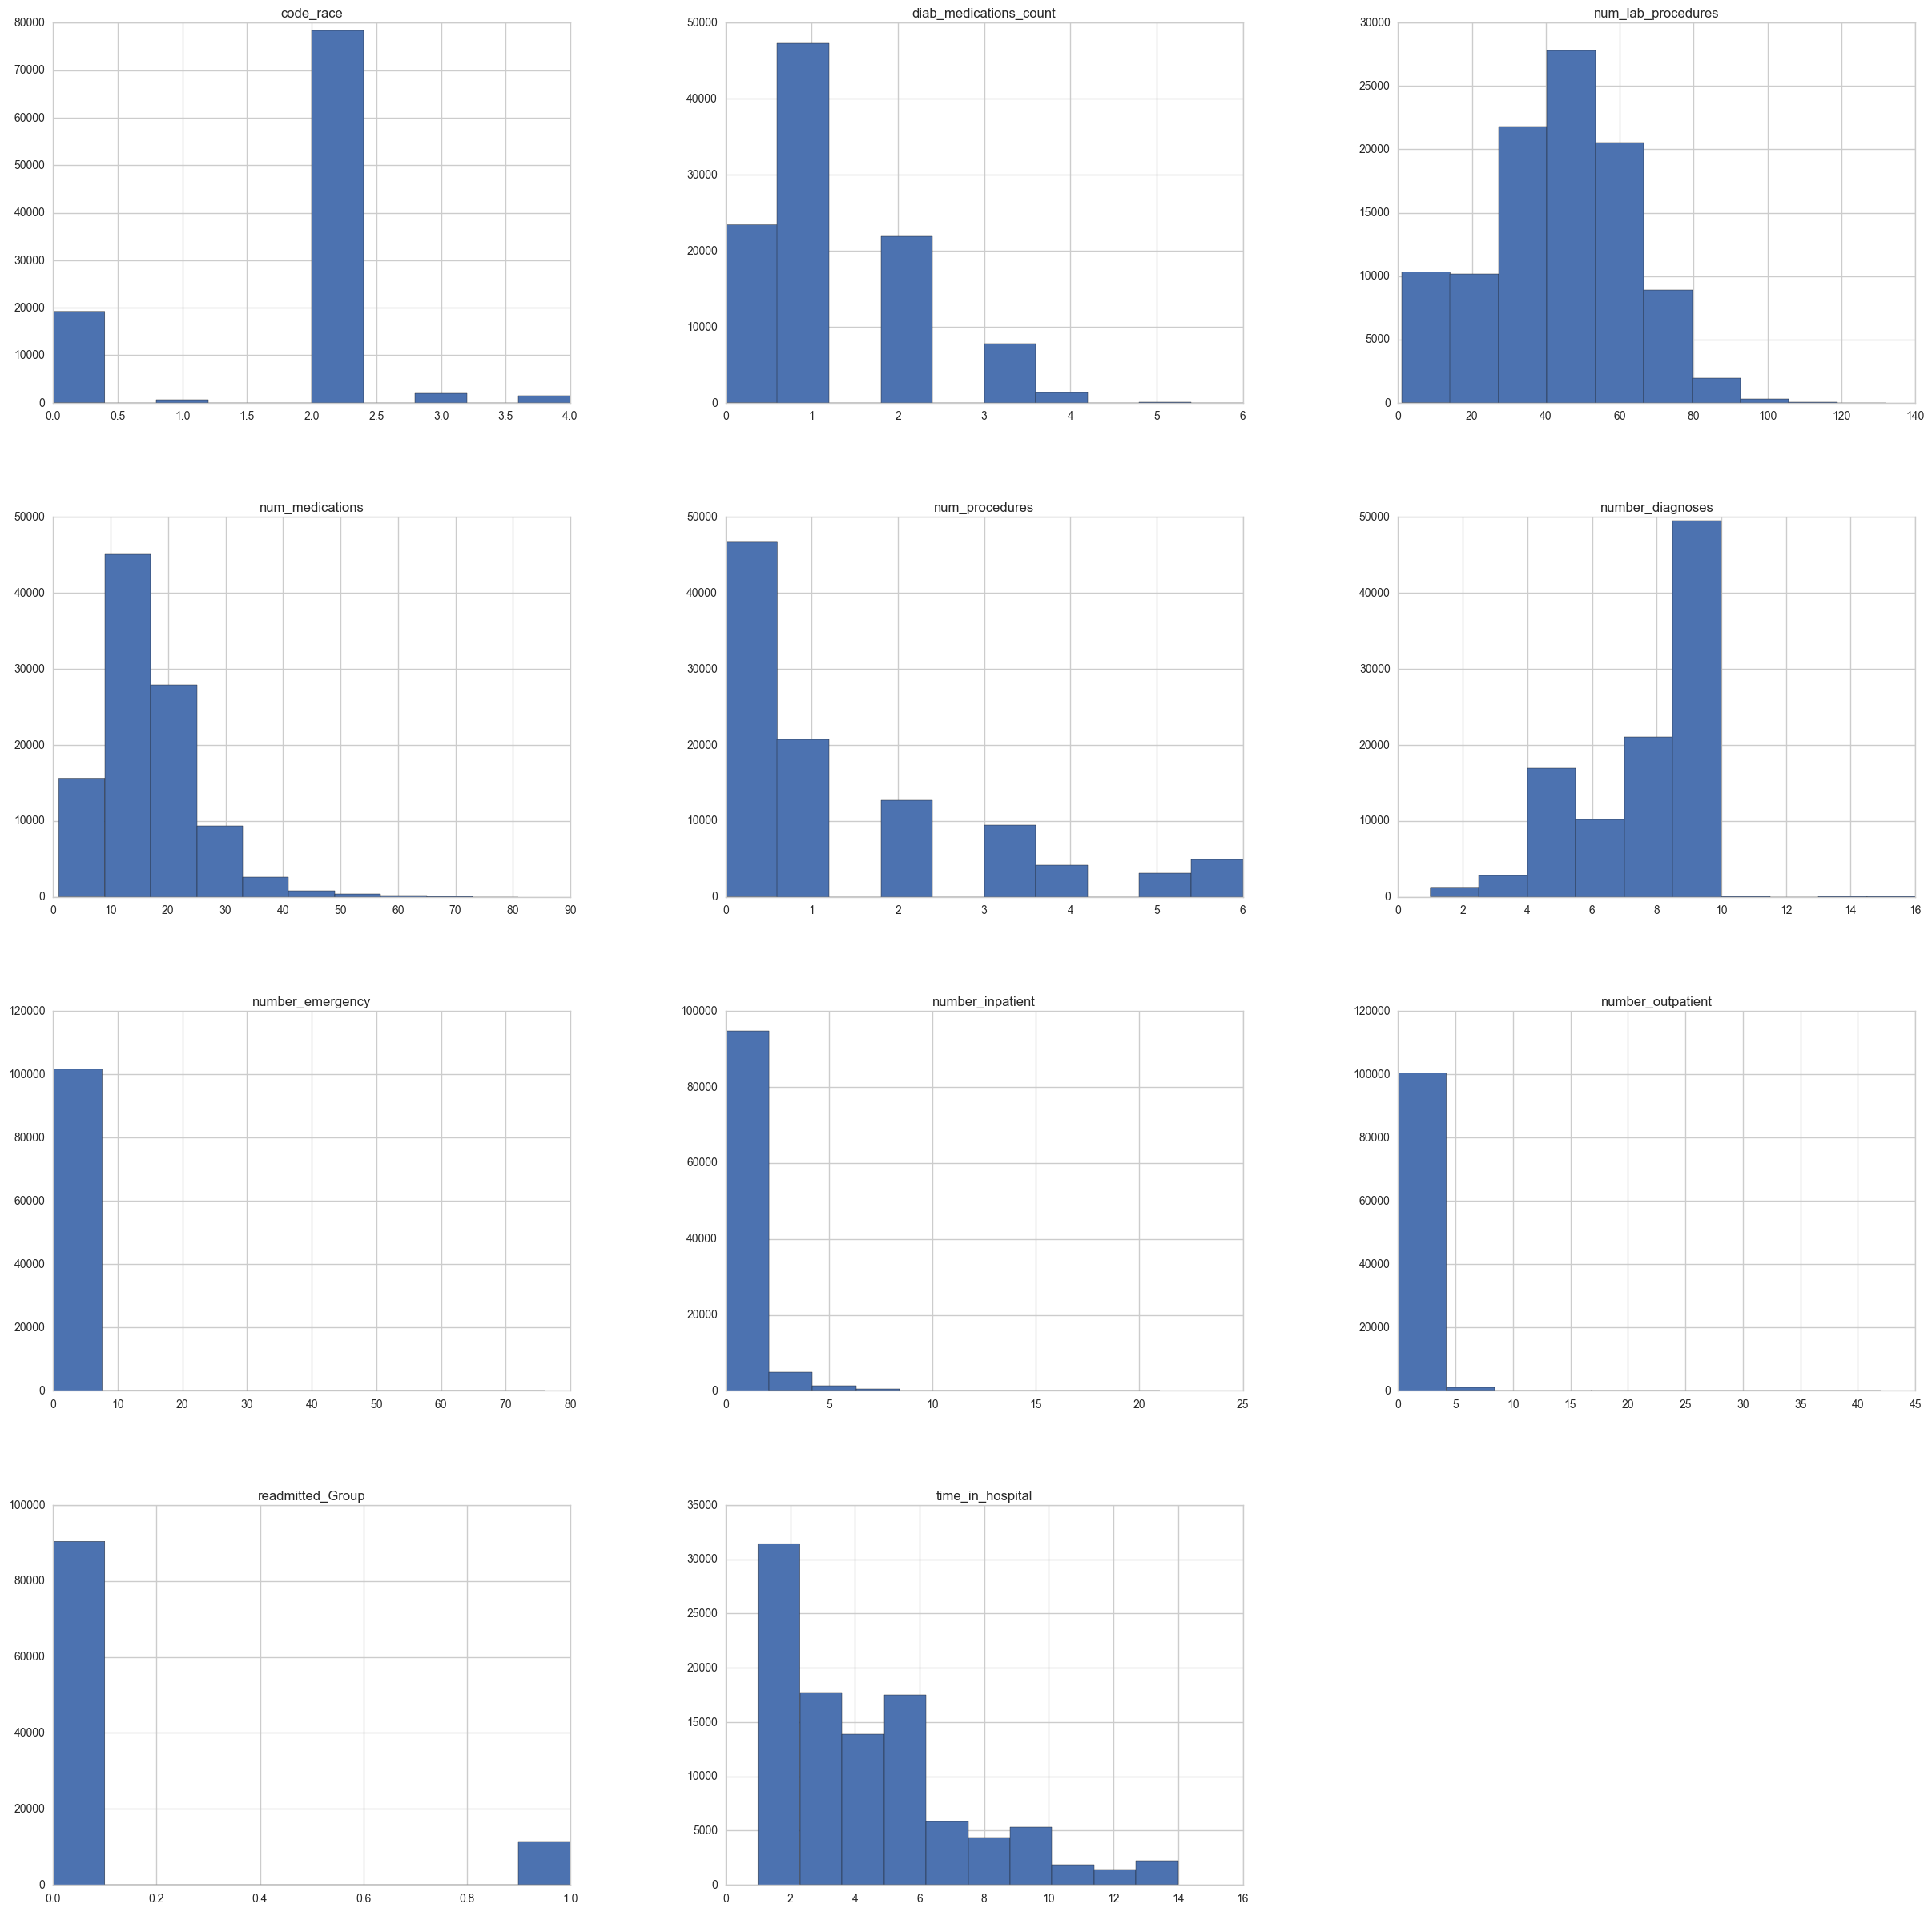

In [18]:
diab.hist(figsize=(30,30))

We want to see the distribution of diagnoses of people with diabetes in hospital. We can see that most of the people in all 3 groups of diagnoses (primary, secondary and additional secondary) were admitted with disease from the Circulatory group and the least amount of people were admitted with disease from the Musculoskeletal group.

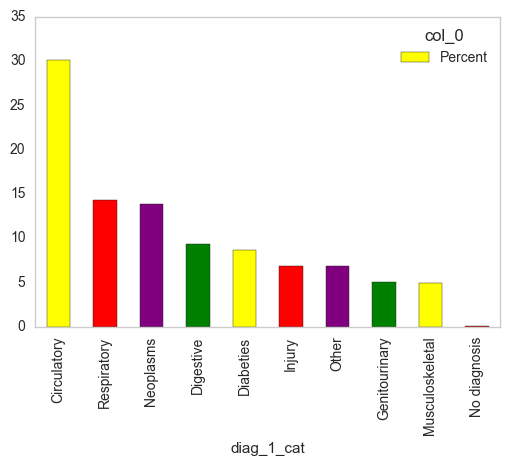

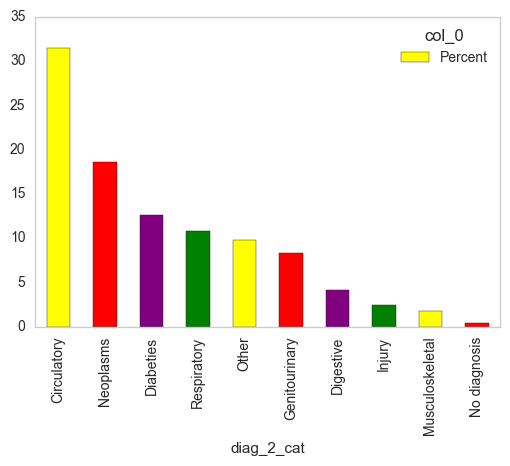

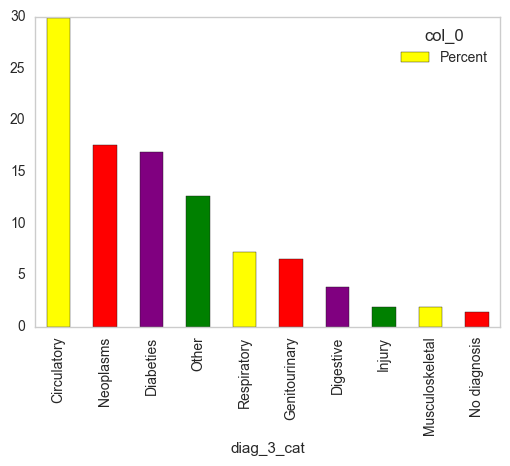

In [19]:
#diagnosis 1 visualization
diag1_counts = pd.crosstab(index = diab["diag_1_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag1_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 2 visualization
diag2_counts = pd.crosstab(index = diab["diag_2_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag2_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
#diagnosis 3 visualization
diag3_counts = pd.crosstab(index = diab["diag_3_cat"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0
                                                                               ).sort_values(by='Percent',ascending=False)
diag3_counts.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)

We can see that people who were admitted with the primary diagnosis from the Musculoskeletal group have the least chance to be readmitted. Meanwhile, the people without primary diagnosis have exceptionally high readmittance rate.

readmitted,<30,NO
diag_1_cat,,
Circulatory,11.45,88.55
Diabeties,12.98,87.02
Digestive,10.71,89.29
Genitourinary,10.85,89.15
Injury,12.25,87.75
Musculoskeletal,9.50,90.50
Neoplasms,10.69,89.31
No diagnosis,23.81,76.19
Other,12.37,87.63


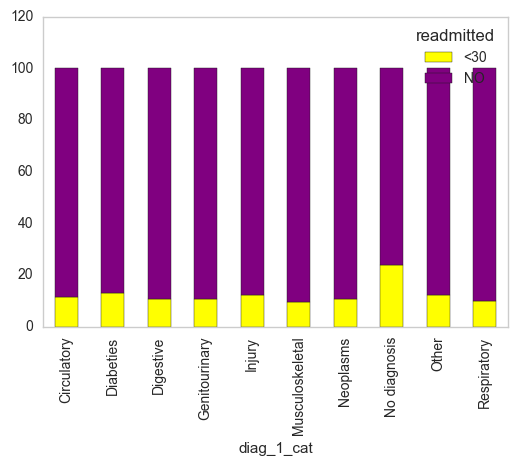

In [20]:
diagnosis_percentage = pd.crosstab(diab['diag_1_cat'],diab['readmitted']).apply(lambda r: r/r.sum()*100, axis=1)
diagnosis_percentage.plot(kind='bar', stacked=True, color=['yellow','purple'], grid=False)
round(diagnosis_percentage,2)

We can see that only about 3% of patients had their weight measured. The surprising fact is that almost 4% of persons of the caucasian race had their weight measured. Meanwhile, no person of the hispanic race had its weight measured.

Percentage of weight_status


col_0,Percent
weight_status,
Measured,3.14
Not measured,96.86


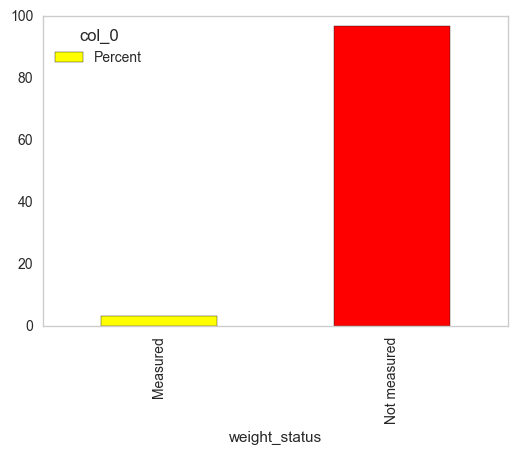

In [21]:
#weigth is coded as meausrement taken or not
diab['weight_status']=np.nan #empty column
diab['weight_status'][diab['weight'].isnull()] ="Not measured"
diab['weight_status'][diab['weight'].notnull()] ="Measured"
weigth_status_percentage = pd.crosstab(index = diab['weight_status'], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)
weigth_status_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
print("Percentage of weight_status")
round(weigth_status_percentage,2)

In [22]:
#wich race have the more weight measured
weight_race=pd.crosstab(diab['race'],diab['weight_status']).apply(lambda r: r/r.sum()*100, axis=1)
weight_race

weight_status,Measured,Not measured
race,,
AfricanAmerican,0.588235,99.411765
Asian,1.404056,98.595944
Caucasian,3.885316,96.114684
Hispanic,0.000000,100.000000
Other,1.992032,98.007968


HbA1C (or A1Cresult) is a measurement of how well diabetes is managed. This is the amount of hemoglobin caught by the blood cells and shows the average glucose level of a person with diabetes for the past 3 months. If the level of HbA1C is high the person has higher chance to get diabetes complications and has higher chance to catch a disease. Because high glucose levels in a blood make blood more viscous and viruses and bacteria like elevated glucose levels because it creates a welcome environment for them.
This way we expect that A1Cresult variable should have a good predictive power of readmittance rate. Unfortunately, in most cases, this measurement isn't available.

We guess if the hospital measured patient weight and A1C it means that this person was treated by people who know how to treat diabetes and provide better care. This way we expect to see the lowest readmittance rate for this persons.
As we can see from the table below our suggestion is true. Persons which had measured A1C have lowest readmittance rate. And persons who had their weight measured were readmitted fewer times that people whos weight wasn't measured.

readmitted                 <30     NO
A1Cresult weight_status              
False     False          11.43  88.57
          True           11.33  88.67
True      False           9.85  90.15
          True            9.83  90.17

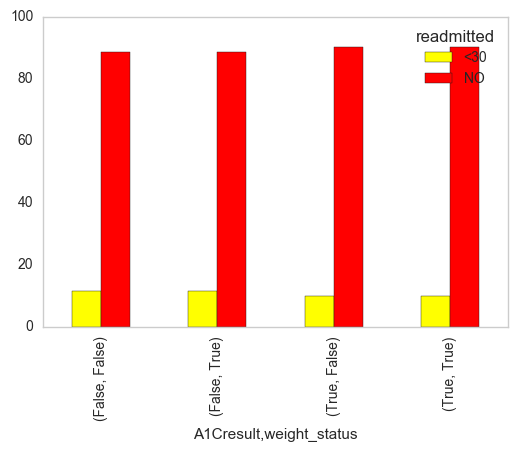

In [23]:
#plot weight_status where A1Cresult was measured
#Left plot weight not measured. Right plot weight measured")
weigth_status_percents = pd.crosstab([diab['A1Cresult']!="None",diab['weight_status']!="Not measured"], 
                              diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
weigth_status_percents.plot(kind='bar', stacked=False, color=['yellow','red','purple'], grid=False)
round(weigth_status_percents,2)
#true, true - measured A1C and weight
#false,false - not measured A1C and weight

Disturbing and frightening fact is that most people were treated by medical professionals who know little about diabetes, which can be seen from the fact that more than 83% of admitted diabetes persons didn't have their A1C result measured.

col_0,Percent
A1Cresult,
>7,3.745848
>8,8.073423
None,83.277322
Norm,4.903406


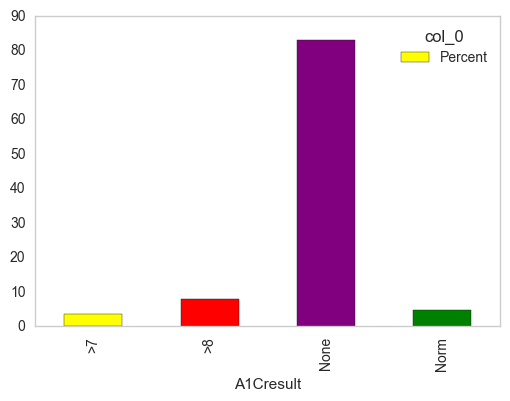

In [24]:
#distribution of A1Cresult
A1Cresult_percentage = pd.crosstab(index = diab["A1Cresult"], columns="Percent").apply(lambda r: r/r.sum()*100, axis=0)

A1Cresult_percentage.plot(kind='bar', stacked=True, color=['yellow','red','purple','green'], grid=False)
A1Cresult_percentage

We can see unsurprising fact that people who had changed diabetes treatment and not measured A1Cresult had the highest readmittance rate.
Surprising fact that the lowest readmittance rate had people with high A1C and no medication change.

readmitted          <30     NO
A1Cresult change              
>7        Ch      10.39  89.61
          No       9.70  90.30
>8        Ch      10.24  89.76
          No       9.17  90.83
None      Ch      12.23  87.77
          No      10.78  89.22
Norm      Ch       9.97  90.03
          No       9.41  90.59

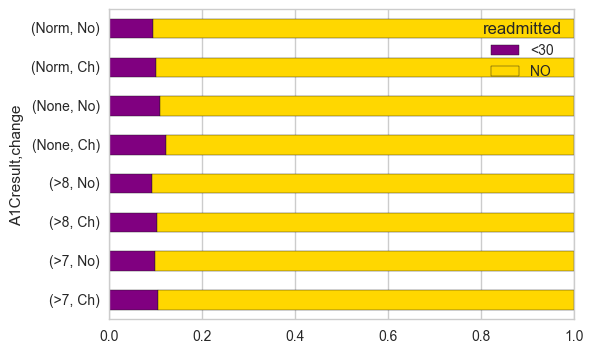

In [25]:
#count readmitted accordint to A1Cresult
A1Cresult_counts = pd.crosstab([diab['A1Cresult'],diab['change']], 
                              diab.readmitted)

# divide the counts to get rates
A1Cresult_rate = A1Cresult_counts.div(A1Cresult_counts.sum(1).astype(float),axis=0)
A1Cresult_rate.plot(kind='barh', 
                   stacked=True,color=['purple','gold'])
#percentage readmitted
round(A1Cresult_rate*100,2)

We'll try to catch newly diagnosed diabetes. This group of patients should have lower readmittance rate within 30 days because after they learned how to manage it, they start doing well.
We can see that this group of patients has the smallest readmittance rate within a group of patients with primary diagnosis diabetes.

readmitted                           <30         NO
diag_1_cat diabetesMed change                      
False      No          No       9.285585  90.714415
           Yes         Ch      11.695739  88.304261
                       No      11.261526  88.738474
True       No          No      14.828897  85.171103
           Yes         Ch      12.878938  87.121062
                       No      12.192067  87.807933

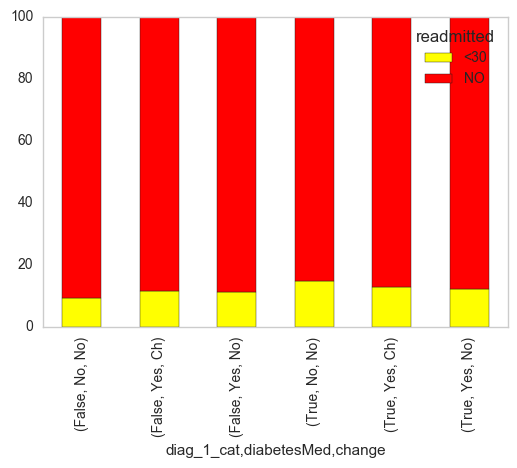

In [26]:
#will try to catch newly diagnosed diabetis. Newly diagnosed shall have primary diagnosis "diabeties", shall have prescribed 
#diabetis medication and shouldn't have change in therapY (because no therapy was before) So combitnation true, true, false
diabPrescr_percents = pd.crosstab([diab['diag_1_cat']=="Diabeties",diab["diabetesMed"],diab["change"]],
                           diab.readmitted).apply(lambda r: r/r.sum()*100, axis=1)
diabPrescr_percents.plot(kind='bar', stacked=True, color=['yellow','red','purple'], grid=False) 
diabPrescr_percents

We can see that females tend to get into the hospital more often than males. Also, we can see that the highest number of the patient hospital is in the age of 70-80. This is explained that with age health usually in decline and at some point people start to die.

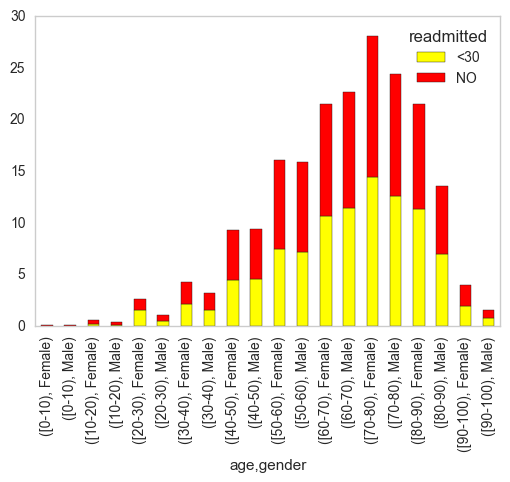

In [39]:
#age and readmittance
age_percents = pd.crosstab([diab['age'],diab["gender"]], diab.readmitted).apply(lambda r: r/r.sum()*100, axis=0)
age_percents.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
#we can see that females tend to get into hospital more often then man. Also, the younger the person, the less chance
#to be readmitted into the hospital. Also, the biggest group of the patients in a hospital is in age 70-80

We want to check if some numeric categorical variables correlated between themselves and if there a correlation between them with and readmitted variable.
From the heat map, we can see, that no variables have the strong correlation between themselves with the strongest correlation of 0.47 between time spent in hospital and number of medications. The strongest correlation with readmission variable has variable number_inpatient with correlation 0.17.
We don't believe any variable will create a collinearity problem.

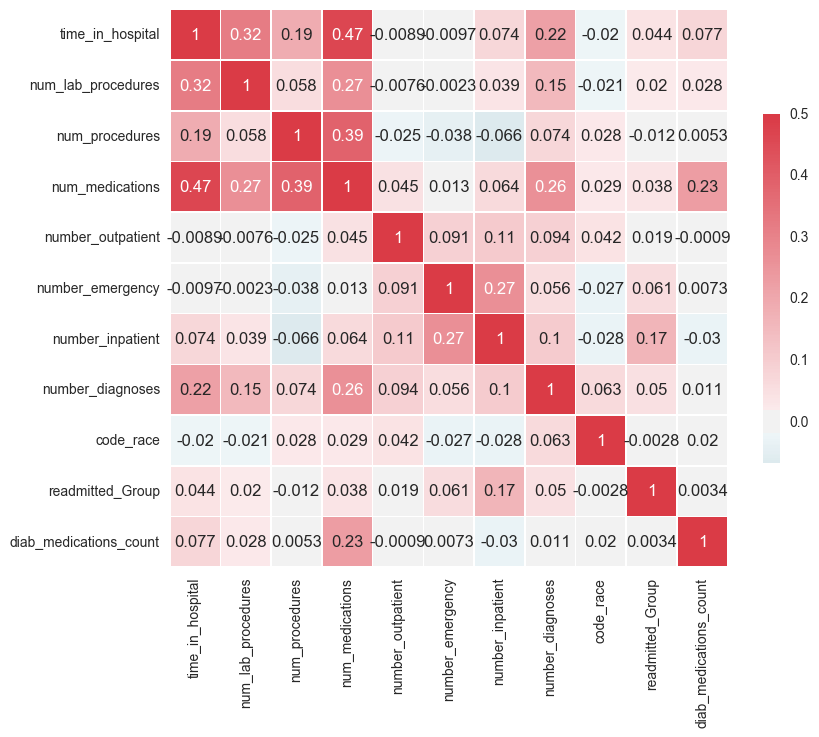

In [28]:
f, ax = plt.subplots(figsize=(9, 9))
#want to see correlation between readmitted and other variables. Correlation is weak with the strongest correlation of
#0.17 for number_inpatient
sns.heatmap(diab.corr(), cmap=cmap, annot=True, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the plots below we can see that variables number_outpatient and number_emergency can be a good predictor because there is a difference in readmittance for this variables. For example person with a greater value of out_patient visits has less chance to be readmitted within 30 days.

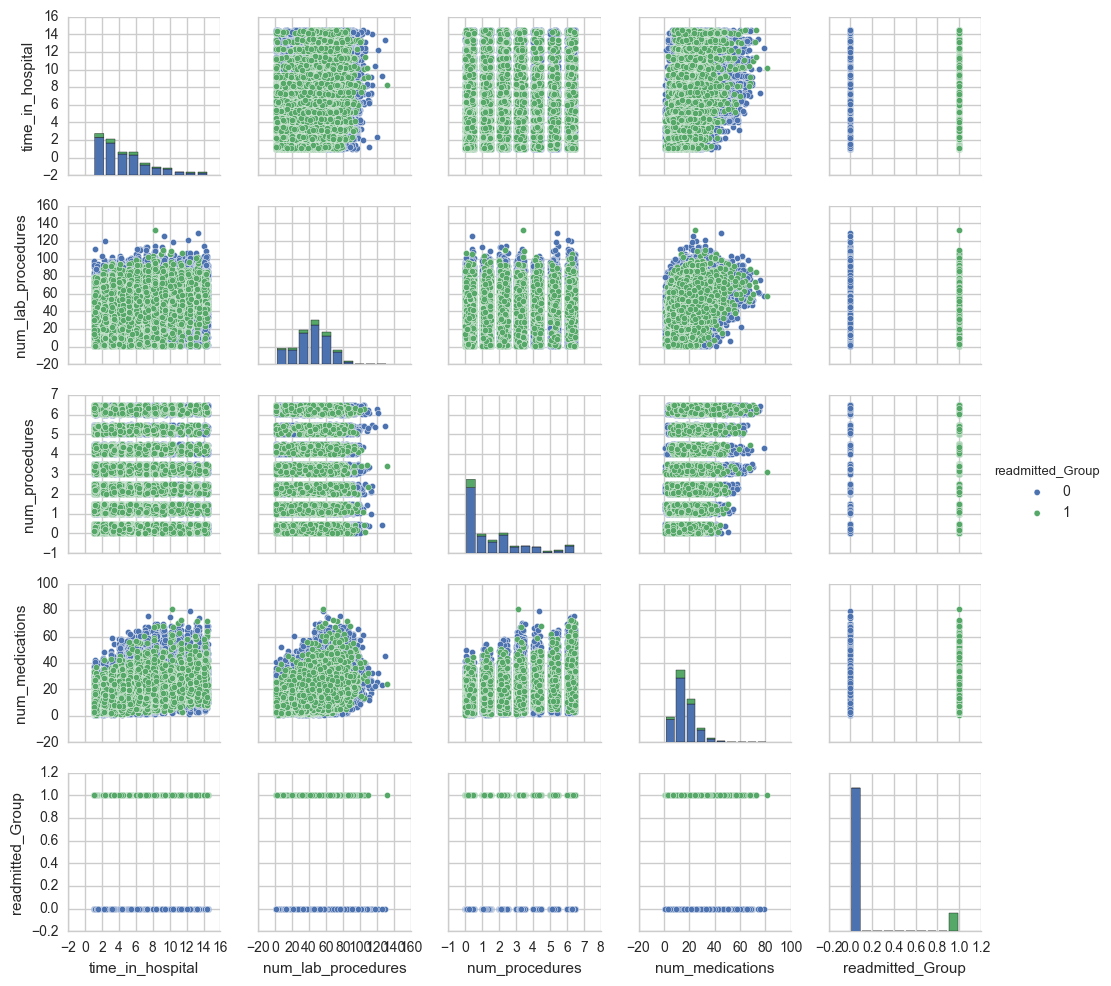

In [29]:
diab_jitter = diab[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',"readmitted_Group"]].copy()
diab_jitter[['time_in_hospital','num_lab_procedures','num_procedures','num_medications']] = diab_jitter[[
        'time_in_hospital','num_lab_procedures','num_procedures','num_medications']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted_Group", size=2)

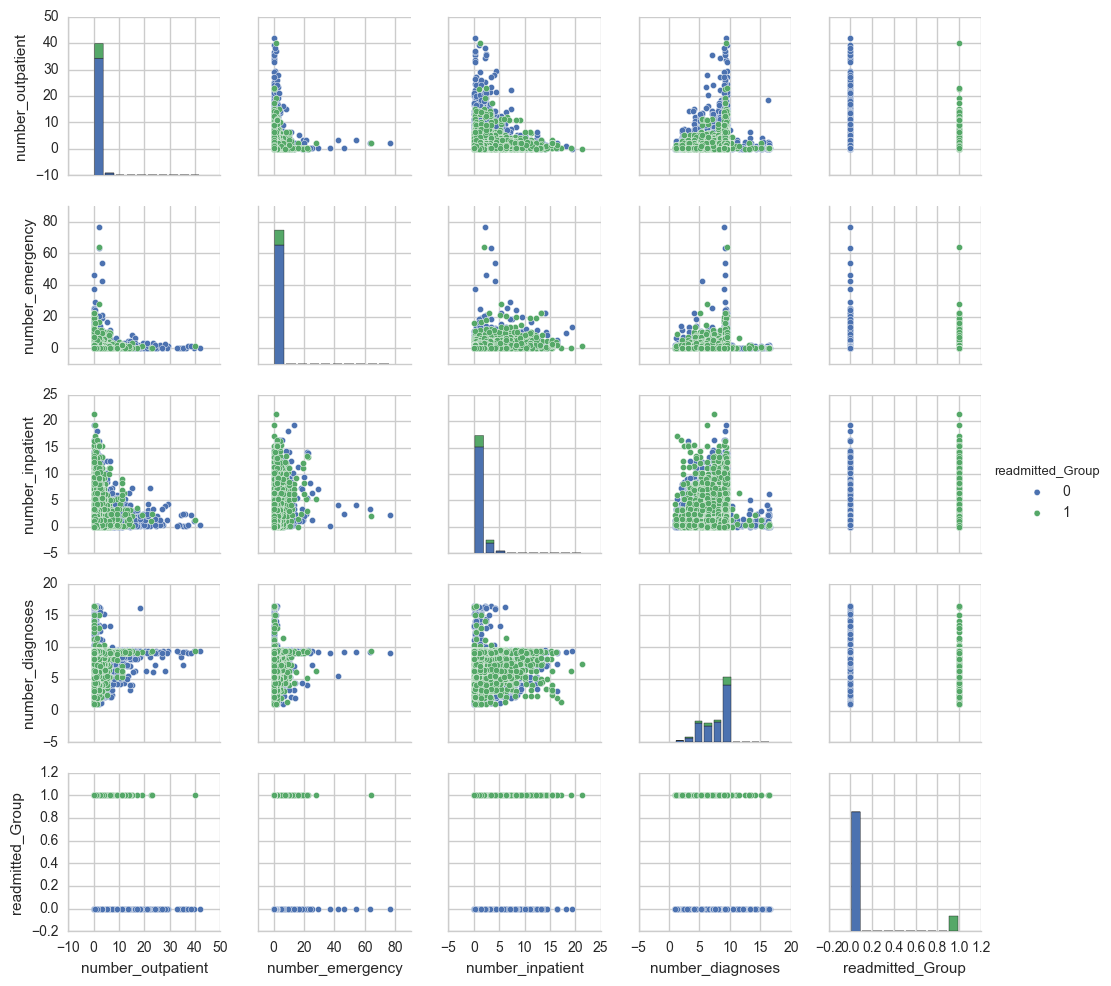

In [30]:
diab_jitter = diab[['number_outpatient','number_emergency','number_inpatient','number_diagnoses',"readmitted_Group"]].copy()
diab_jitter[['number_outpatient','number_emergency','number_inpatient','number_diagnoses']] = diab_jitter[[
        'number_outpatient','number_emergency','number_inpatient','number_diagnoses']].values + np.random.rand(len(diab_jitter),4)/2 
sns.pairplot(diab_jitter, hue="readmitted_Group", size=2)

We can see that the most patients with diabetes who get in a hospital use insulin drug. Also, this category of the patient has the better chance of readmittance. This thing is expected because of insulin use patients with:
1. Type 1 diabetes. This type represents just about 5% of diabetes but this type is harder manageable and prone to complications, ketoacidosis, and hypoglycemia. This increases chances of hospital readmittance.
2. Hard to manage type 2 diabetes. 
3. Gestational diabetes. Diabetes of pregnant woman. This group has increased the chance of readmittance.

col_0,Percent
med_cat,
Insulin,53.44
Other,46.56


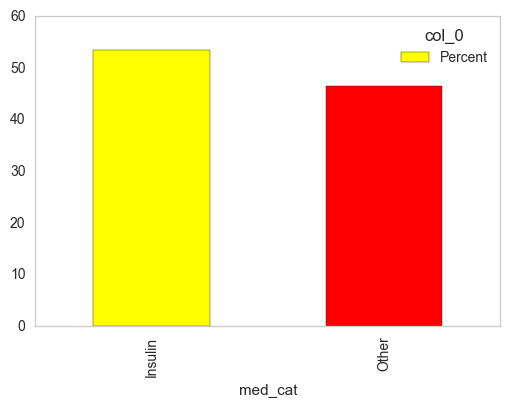

In [31]:
diab["med_cat"]="Other"
diab["med_cat"][(diab["insulin"]=="Up")|(diab["insulin"]=="Down")|(diab["insulin"]=="Steady")]="Insulin"
medication=pd.crosstab(index=diab["med_cat"],columns="Percent").apply(lambda r: round(r/r.sum()*100,2), axis=0)
medication.plot(kind='bar', stacked=True, color=['yellow','red'], grid=False) 
medication

readmitted,<30,NO
med_cat,,
Insulin,12.14,87.86
Other,10.04,89.96


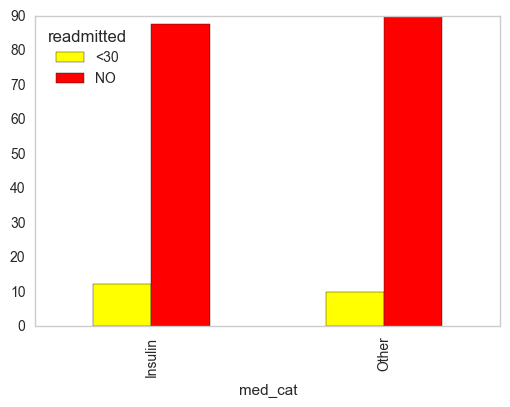

In [32]:
medication=pd.crosstab(diab["med_cat"],diab["readmitted"]).apply(lambda r: round(r/r.sum()*100,2), axis=1)
medication.plot(kind='bar', stacked=False, color=['yellow','red'], grid=False) 
medication

We can see that 5 records had patients (not necessary different) who took 6 medications for diabetes management. We can see that admittance rate is quite high for them.

1    47314
0    23403
2    21872
3     7778
4     1335
5       59
6        5
Name: diab_medications_count, dtype: int64

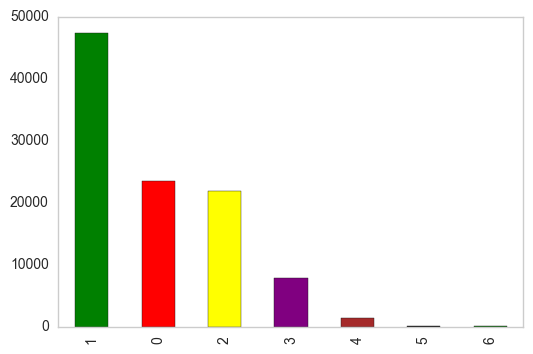

In [33]:
diab["diab_medications_count"].value_counts().plot(kind='bar', stacked=False, color=['green','red','yellow','purple','brown','black'], grid=False) 
diab["diab_medications_count"].value_counts()

readmitted,<30,NO
diab_medications_count,,
0,9.597060,90.402940
1,12.292345,87.707655
2,10.721470,89.278530
3,10.439702,89.560298
4,10.187266,89.812734
5,0.000000,100.000000
6,40.000000,60.000000


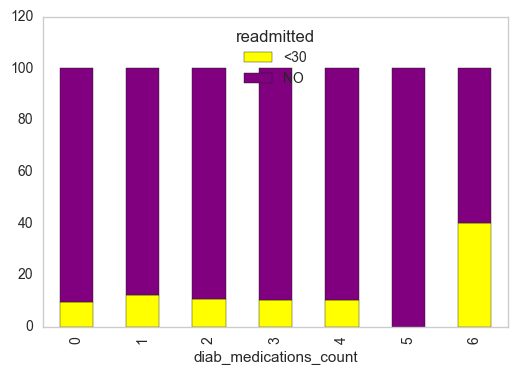

In [45]:
med_count=pd.crosstab(diab["diab_medications_count"],diab["readmitted"]).apply(lambda r: r/r.sum()*100, axis=1)
med_count.plot(kind='bar', stacked=True, color=['yellow','purple'], grid=False) 
med_count

We can see that more people of Asian heritage than any other were able to manage diabetes without medications. Also, we can see that they tend to take less diabetes management drugs than other races.

diab_medications_count,0,1,2,3,4,5,6
race,,,,,,,
AfricanAmerican,22.967,48.938,19.922,6.934,1.161,0.078,0.000
Asian,25.897,44.930,21.841,5.772,1.092,0.468,0.000
Caucasian,23.032,45.946,21.832,7.792,1.341,0.051,0.005
Hispanic,23.859,43.790,22.091,8.689,1.522,0.049,0.000
Other,19.124,48.074,22.908,8.300,1.527,0.000,0.066


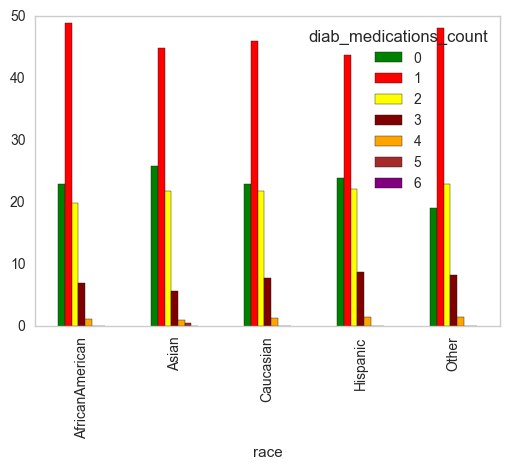

In [48]:
#number of medications by race
med_race=pd.crosstab(diab['race'],diab["diab_medications_count"]).apply(lambda r: r/r.sum()*100, axis=1)
med_race.plot(kind='bar', stacked=False, color=['green','red','yellow','maroon','orange','brown','purple'], grid=False) 
round(med_race,3)

Among all races Asian race and group "other" (We believe it could be mixed race) has lower admittance rate.

readmitted,<30,NO
race,,
AfricanAmerican,11.218116,88.781884
Asian,10.140406,89.859594
Caucasian,11.202981,88.797019
Hispanic,10.407462,89.592538
Other,9.628154,90.371846


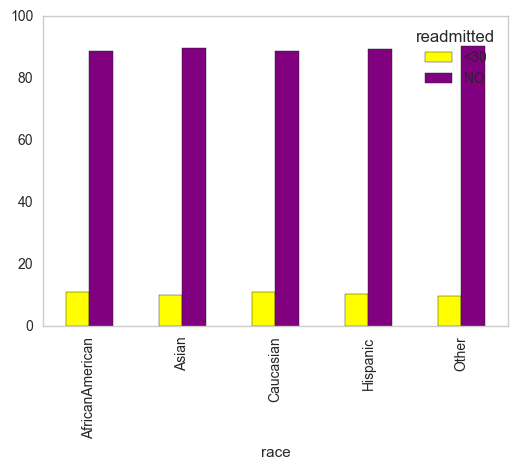

In [35]:
#readmittance by race
readm_race=pd.crosstab(diab['race'],diab["readmitted"]).apply(lambda r: r/r.sum()*100, axis=1)
readm_race.plot(kind='bar', stacked=False, color=['yellow','purple'], grid=False) 
readm_race

#### Variable transformation
After data exploratory phase, we decided to create additional columns that may be useful for the next phase of analysis.

1, we created a med_increase variable to denote if the medication given was increased during the visit.

In [47]:
pd.options.mode.chained_assignment = None #supress warnings
diab['med_increase']=0
#then make readmittance binary variable
diab['med_increase'][(diab['metformin']=="Up")|(diab['repaglinide']=="Up")|(diab['nateglinide']=="Up")
                    |(diab['glimepiride-pioglitazone']=="Up")|(diab['metformin-rosiglitazone']=="Up")
                     |(diab['metformin-pioglitazone']=="Up")|(diab['chlorpropamide']=="Up")|(diab['glimepiride']=="Up")
                     |(diab['acetohexamide']=="Up")|(diab['glipizide']=="Up")|(diab['glyburide']=="Up")
                     |(diab['tolbutamide']=="Up")|(diab['pioglitazone']=="Up")|(diab['rosiglitazone']=="Up")
                     |(diab['acarbose']=="Up")|(diab['miglitol']=="Up")|(diab['troglitazone']=="Up")|(diab['tolazamide']=="Up")
                    |(diab['examide']=="Up")|(diab['citoglipton']=="Up")|(diab['insulin']=="Up")
                    |(diab['glyburide-metformin']=="Up")|(diab['glipizide-metformin']=="Up")] =1



KeyError: 'glimepiride-pioglitazone'

#### Exceptional work: Principal component analysis
implement dimensionality reduction, then visualize and interpret the results

Using PCA technique, we grouped all the numeric variables and performed Principal component analysis on the data. 



In [ ]:
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(diab)

#Create Numeric Only Dataframe
diabInt64 = dfDataTypes.select_dtypes(['int64'])

components = 5

pca = PCA( n_components= components)

#Run PCA
diabPCA_pca = pca.fit(diabInt64).transform(diabInt64) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_


#Run PCA
fig = plt.figure(figsize=(8,5))
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot on Diabetes Data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

Based on cree plot graphical analysis, the optimal PCA components should be 3.